### BUSINESS PROBLEM

**Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.**

**Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!**

**Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.**

**The company wants to know:**

- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

- How well those variables describe the electric cycle demands

In [111]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as spy
from scipy.stats import f_oneway, kruskal
from statsmodels.graphics.gofplots import qqplot

In [2]:
# importing file
df = pd.read_csv(f"https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")

In [3]:
# basic information about the values present in the dataset
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# shape of data
df.shape

(10886, 12)

In [5]:
print("No. of rows = ",df.shape[0])

No. of rows =  10886


In [6]:
print("No. of columns = ", df.shape[1])

No. of columns =  12


In [7]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [8]:
# data types of columns
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [9]:
# checking for missing or null values
df.isnull().sum()


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**No null/missing values are present.**

In [10]:
# checking for duplicated values
df[df.duplicated()]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


**No duplicate value is present.**

In [11]:
# information about dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [12]:
# change of datatype of columns to proper datatype
df['datetime'] = pd.to_datetime(df['datetime'])

In [13]:
col_to_object = ["season", "holiday", "workingday", "weather"]

for i in col_to_object:
    df[i] = df[i].astype('object')

In [14]:
df['datetime'].min()

Timestamp('2011-01-01 00:00:00')

In [15]:
df['datetime'].max()

Timestamp('2012-12-19 23:00:00')

In [16]:
# lets check the duration for which data is collected
df['datetime'].max()-df['datetime'].min()

Timedelta('718 days 23:00:00')

In [17]:
# basic statistical analysis
df.iloc[:, 1:].describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


**The <font color='blue'>casual</font> and <font color='blue'>registered</font> attributes might have outliers because their mean and median are very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes.**

In [18]:
cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
colors = np.random.permutation(['red', 'blue', 'green', 'magenta', 'cyan', 'gray','yellow'])

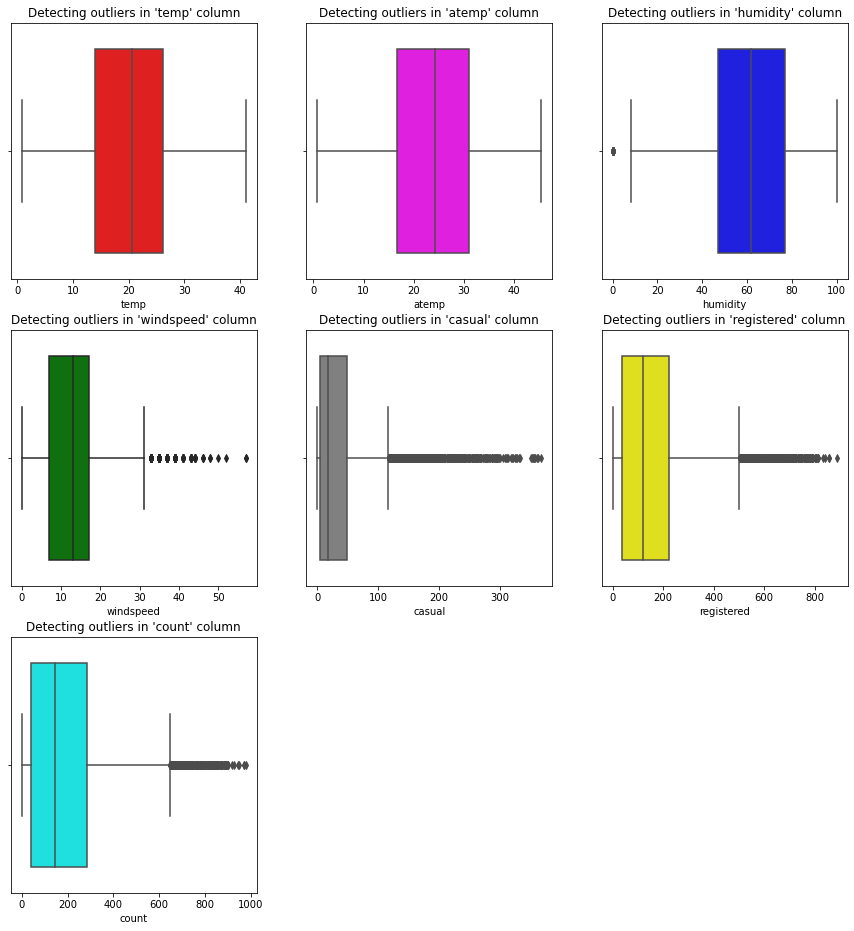

In [19]:
#outliers detection
count = 1
plt.figure(figsize = (15, 16))
for i in cols:
    plt.subplot(3, 3, count)
    plt.title(f"Detecting outliers in '{i}' column")
    sns.boxplot(data = df, x = df[i], color = colors[count - 1])
    plt.plot()
    count += 1


- No outliers in temp and atemp columns.
- Humidity column has some outliers.
- Windspeed, casual, registered and count has a lot number of outliers.

**As this data contains date and time we can consider it as a time series data and we can use the date column as index and then using the resample() function we can analyze the trends.**

In [20]:
# setting the 'date' column as the index of the DataFrame, making it a time series.
df.set_index('datetime', inplace = True)

In [21]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### NON VISUAL ANALYSIS

In [22]:
# number of unique seasons
df['season'].nunique()

4

In [23]:
# total counts of seasons
df['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [24]:
df['holiday'].nunique()

2

In [25]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [26]:
df['workingday'].nunique()

2

In [27]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [28]:
df['temp'].nunique()

49

In [29]:
df['atemp'].nunique()

60

### VISUAL ANALYSIS

**UNIVARIATE & BIVARIATE**

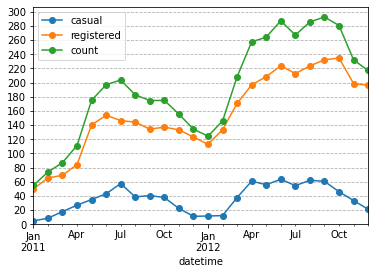

In [30]:
# monthly average values for the 'casual', 'registered', and 'count' variables
# resampling the data on a monthly basis, and calculating the mean value of 'casual', 'registered' and 'count' users for each month

# plotting a line plot for the monthly mean values
df.resample('M')['casual'].mean().plot(kind = 'line', legend = 'casual', marker = 'o')
df.resample('M')['registered'].mean().plot(kind = 'line', legend = 'registered', marker = 'o')
df.resample('M')['count'].mean().plot(kind = 'line', legend = 'count', marker = 'o')

plt.grid(axis = 'y', linestyle = '--')    
plt.yticks(np.arange(0, 301, 20))
plt.ylim(0,)    
plt.show()      

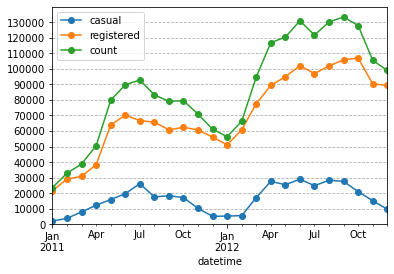

In [31]:
# monthly total values for the 'casual', 'registered', and 'count' variables
# resampling the data on a monthly basis, and calculating the total value of 'casual', 'registered' and 'count' users for each month


# plotting a line plot for the monthly total values

df.resample('M')['casual'].sum().plot(kind = 'line', legend = 'casual', marker = 'o')
df.resample('M')['registered'].sum().plot(kind = 'line', legend = 'registered', marker = 'o')
df.resample('M')['count'].sum().plot(kind = 'line', legend = 'count', marker = 'o')

plt.grid(axis = 'y', linestyle = '--')    
plt.yticks(np.arange(0, 130001, 10000))
plt.ylim(0,)    
plt.show() 

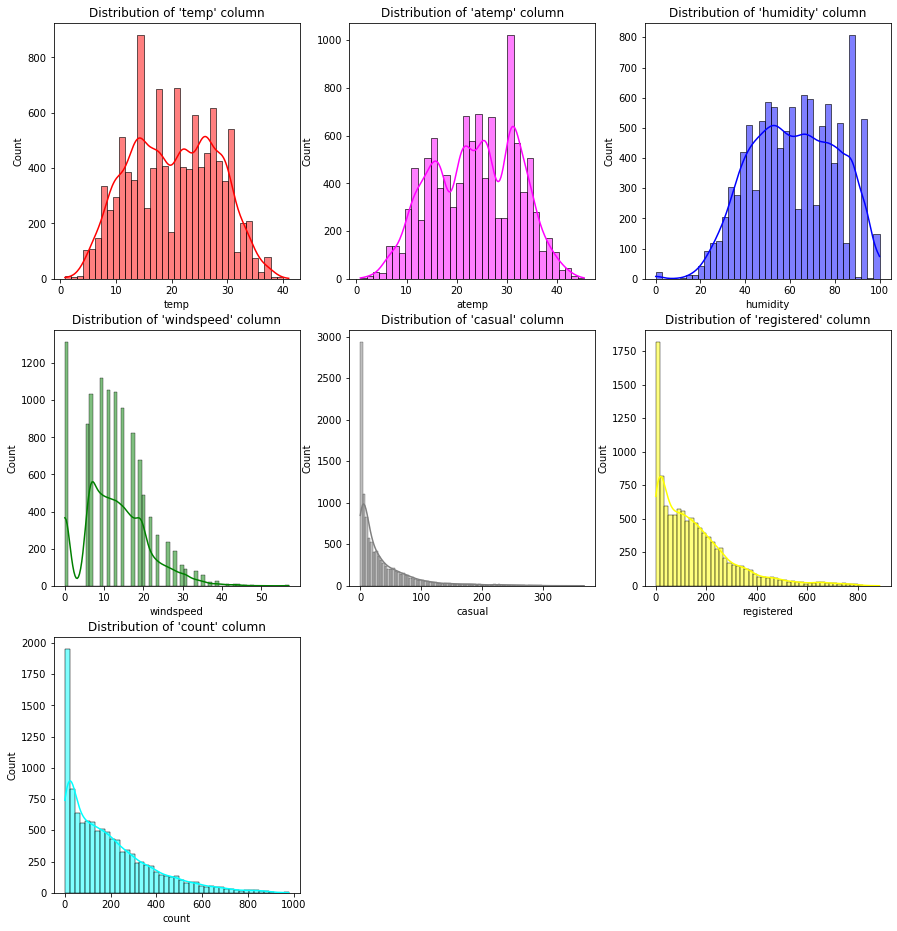

In [32]:
# understanding the distribution for numerical variables

count = 1
plt.figure(figsize = (15, 16))
for i in cols:
    plt.subplot(3, 3, count)
    plt.title(f"Distribution of '{i}' column")
    sns.histplot(data = df, x = df[i], color = colors[count - 1], kde=True)
    plt.plot()
    count += 1

- casual, registered and count somewhat looks like Log Normal Distrinution
- temp, atemp and humidity looks like they follows the Normal Distribution
- windspeed follows the binomial distribution

In [33]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [34]:
# demand of electric vehichles on hourly basis for different years.

df1 = df.resample('Y')['count'].mean().to_frame().reset_index()
df1['p_count'] = df1['count'].shift(1)                                 # creating a previous count column
df1['growth_percent'] = (df1['count'] - df1['p_count']) * 100 / df1['p_count'] # calculating growth percentage
df1


,datetime,count,p_count,growth_percent
0,2011-12-31,144.223349,NaN,NaN
1,2012-12-31,238.560944,144.223349,65.410764


- It shows that there was a rise of <font color='blue'>65.41%</font> from 2011 to 2012 for rental bikes on an hourly basis. It shows positive growth

In [35]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [36]:
df.reset_index(inplace = True)

In [37]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [38]:
# demand of electric vehichles on hourly basis for different months

df2 = df.groupby(by = df['datetime'].dt.month)['count'].mean().reset_index()
df2.rename(columns = {'datetime' : 'month'}, inplace = True)

df2['prev_count'] = df2['count'].shift(1) 

# Calculating the growth percentage of 'count' with respect to the 'count' of previous month
df2['growth_percent'] = (df2['count'] - df2['prev_count']) * 100 / df2['prev_count']
df2.set_index('month', inplace = True)
df2

,count,prev_count,growth_percent
month,,,
1,90.366516,NaN,NaN
2,110.003330,90.366516,21.730188
3,148.169811,110.003330,34.695751
4,184.160616,148.169811,24.290241
5,219.459430,184.160616,19.167406
6,242.031798,219.459430,10.285440
7,235.325658,242.031798,-2.770768
8,234.118421,235.325658,-0.513007
9,233.805281,234.118421,-0.133753


- There is a rise in the demand of rental bikes from januaray to march month with march showing maximum demamd having <font color='blue'>34.69%</font> growth.
- From april to june the demand decreases but having positive growth value.
- From July onwards the demand for rental bike decreases with huge margin and growth percentage having negative values with november showing <font color='blue'>-14.94%</font> decrease. 

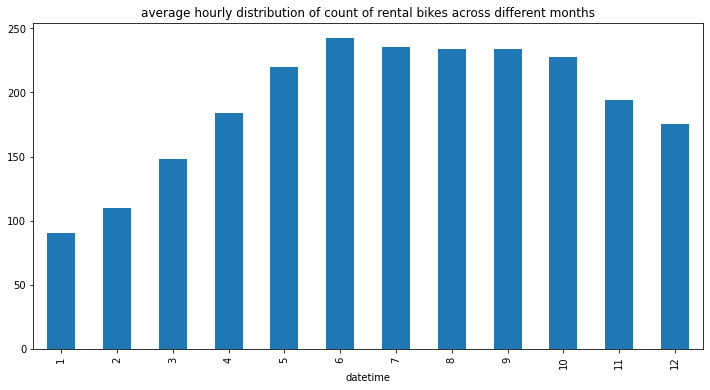

In [39]:
# average hourly distribution of count of rental bikes across different months
# x-axis is showing months and y-axis is showing count. 

plt.figure(figsize = (12, 6))
df.groupby(by = df['datetime'].dt.month)['count'].mean().plot(kind='bar')
plt.title("average hourly distribution of count of rental bikes across different months")
plt.show()

- The average hourly count of rental bikes is the highest in the month of June followed by July and August.
- The average hourly count of rental bikes is the lowest in the month of January followed by February and March.
- Overall, these trends suggest a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.

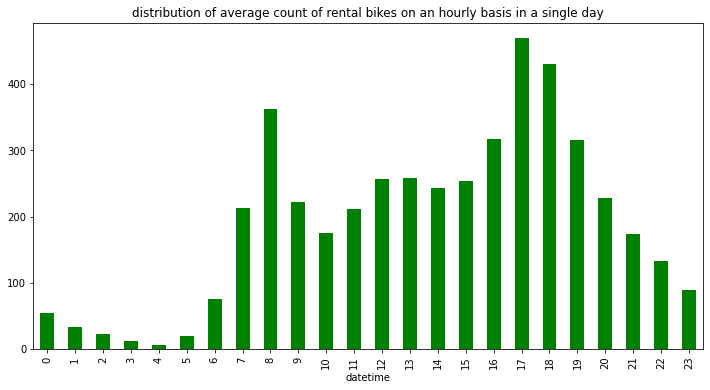

In [40]:
# distribution of average count of rental bikes on an hourly basis in a single day
# x-axis is showing hours and y-axis is showing count.

plt.figure(figsize = (12, 6))
df.groupby(by = df['datetime'].dt.hour)['count'].mean().plot(kind='bar', color='green')
plt.title("distribution of average count of rental bikes on an hourly basis in a single day")
plt.show()

- The average count of rental bikes is the highest at 5 PM followed by 6 PM and 8 AM of the day, these are peak office hours so it is obvious.
- The average count of rental bikes is the lowest at 4 AM followed by 3 AM and 5 AM of the day. 

In [41]:
# 1: spring, 2: summer, 3: fall, 4: winter
def season_category(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'
df['season'] = df['season'].apply(season_category)

In [42]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1


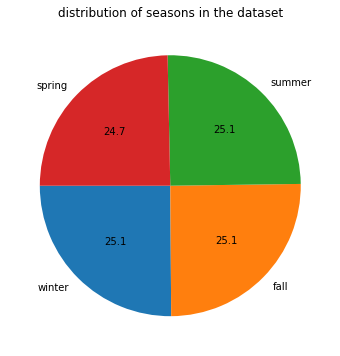

In [43]:
# distribution of seasons in the dataset
plt.figure(figsize = (8, 6))
plt.title("distribution of seasons in the dataset")
df_season = np.round(df['season'].value_counts(normalize = True) * 100, 2).to_frame()
#plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.pie(x=df_season['season'], labels=df_season.index, autopct='%1.1f', startangle=180)
plt.show()

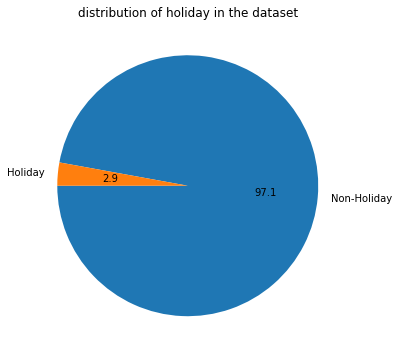

In [44]:
# distribution of holiday in the dataset
plt.figure(figsize = (8, 6))
plt.title("distribution of holiday in the dataset")
df_holiday = np.round(df['holiday'].value_counts(normalize = True) * 100, 2).to_frame()
plt.pie(x=df_holiday['holiday'], labels=['Non-Holiday', 'Holiday'], autopct='%1.1f', startangle=180)
plt.show()

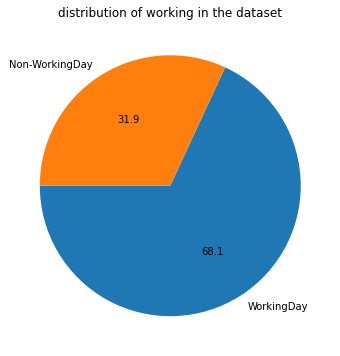

In [45]:
# distribution of working in the dataset
plt.figure(figsize = (8, 6))
plt.title("distribution of working in the dataset")
df_workingday = np.round(df['workingday'].value_counts(normalize = True) * 100, 2).to_frame()
plt.pie(x=df_workingday['workingday'], labels=['WorkingDay', 'Non-WorkingDay'], autopct='%1.1f', startangle=180)
plt.show()

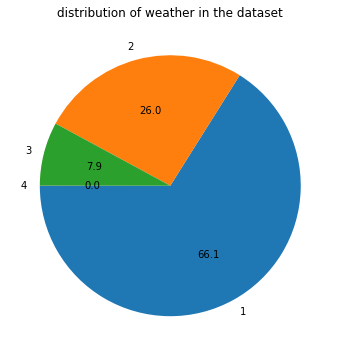

In [46]:
# distribution of weather in the dataset
plt.figure(figsize = (8, 6))
plt.title("distribution of weather in the dataset")
df_weather = np.round(df['weather'].value_counts(normalize = True) * 100, 2).to_frame()
plt.pie(x=df_weather['weather'], labels=df_weather.index, autopct='%1.1f', startangle=180)
plt.show()

In [47]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1


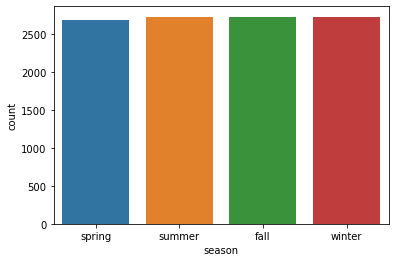

In [48]:
# distribution of seasons

sns.countplot(data=df, x='season')
plt.show()

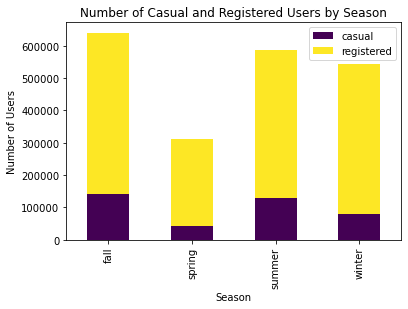

In [49]:
# distriution of users according to season

selected_columns = df[['season', 'casual', 'registered']]
season_counts = selected_columns.groupby('season').sum()
season_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Season')
plt.ylabel('Number of Users')
plt.title('Number of Casual and Registered Users by Season')
plt.show()

- The above graph shows that fall season has more number of users followed by summer and winter.

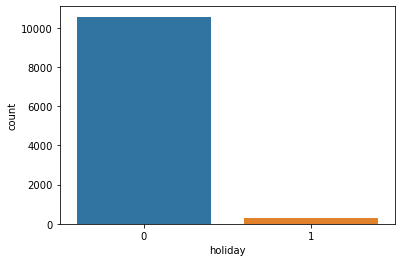

In [50]:
 # distribution of holiday in the dataset 
    # 1 - Holiday, 2- Non-holiday
    
sns.countplot(data = df, x = 'holiday')
plt.show() 

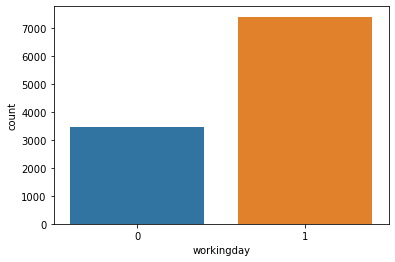

In [51]:
# distribution of workingday in the dataset

sns.countplot(data = df, x = 'workingday')
plt.show()

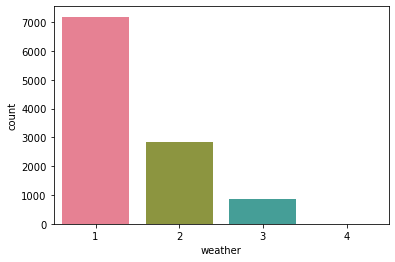

In [52]:
 # distribution of weather in the dataset

sns.countplot(data = df, x = 'weather', palette='husl')
plt.show() 

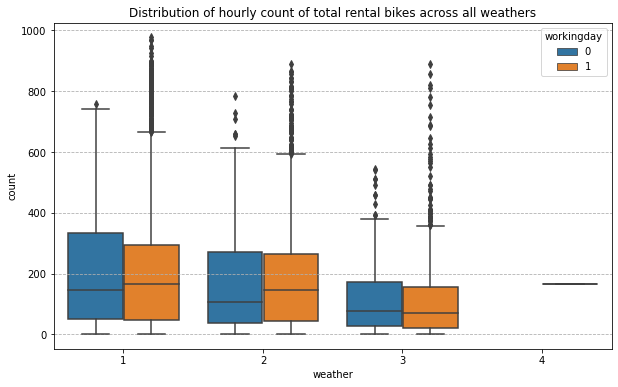

In [53]:
# Distribution of hourly count of total rental bikes across all weathers
plt.figure(figsize = (10, 6))
plt.title('Distribution of hourly count of total rental bikes across all weathers')
sns.boxplot(data = df, x = 'weather', y = 'count', hue = 'workingday')
plt.grid(axis = 'y', linestyle = '--')
plt.show()

- The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

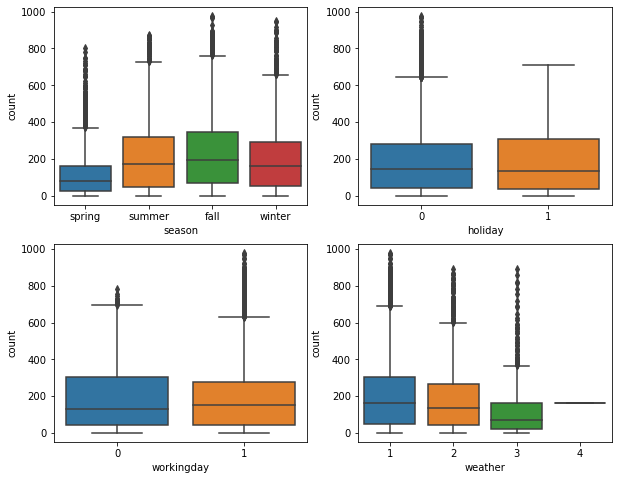

In [54]:
# plotting categorical variables againt count using boxplots
cat_cols=['season','holiday','workingday','weather']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

In [55]:
print("Mean Temperature = ", np.round(df['temp'].mean(),2))
print("Std. Deviation of Temperature = ", np.round(df['temp'].std(),2))

Mean Temperature =  20.23
Std. Deviation of Temperature =  7.79


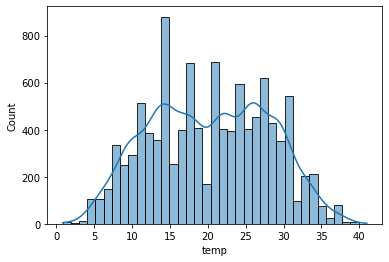

In [56]:
# distribution of temperature in the dataset
sns.histplot(data = df, x = 'temp', kde = True)
plt.show()

In [57]:
print("Mean ATemperature = ", np.round(df['atemp'].mean(),2))
print("Std. Deviation of ATemperature = ", np.round(df['atemp'].std(),2))

Mean ATemperature =  23.66
Std. Deviation of ATemperature =  8.47


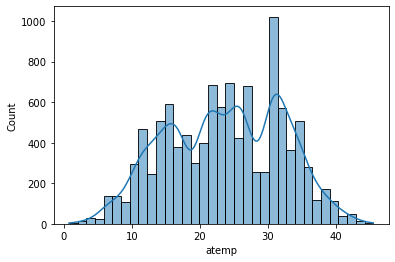

In [58]:
# distribution of Atemperature in the dataset
sns.histplot(data = df, x = 'atemp', kde = True)
plt.show()

In [59]:
  print("Mean Humidity = ", np.round(df['humidity'].mean(),2))
print("Std. Deviation of Humidity = ", np.round(df['humidity'].std(),2))

Mean Humidity =  61.89
Std. Deviation of Humidity =  19.25


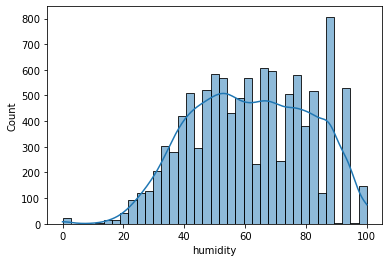

In [60]:
# distribution of humidity in the dataset
sns.histplot(data = df, x = 'humidity', kde = True)
plt.show()

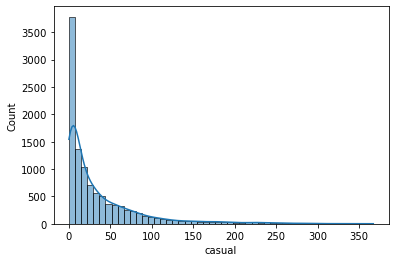

In [61]:
# distribution of casual users in the dataset
sns.histplot(data = df, x = 'casual', kde = True, bins = 50)
plt.show()

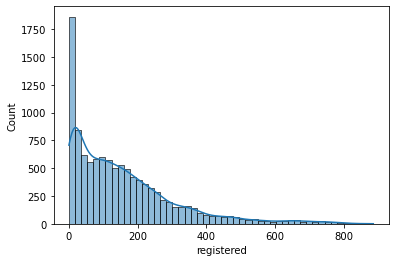

In [62]:
# distribution of registered users in the dataset
sns.histplot(data = df, x = 'registered', kde = True, bins = 50)
plt.show()

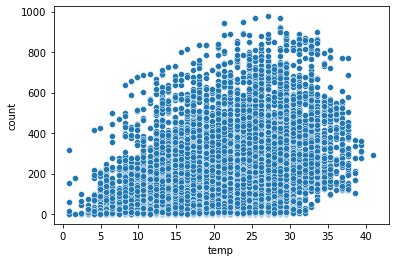

In [63]:
# bikes distribution according to temperature
sns.scatterplot(data=df, x='temp', y='count')
plt.show()

- When temperature is less than 10 the demand of bikes are low.

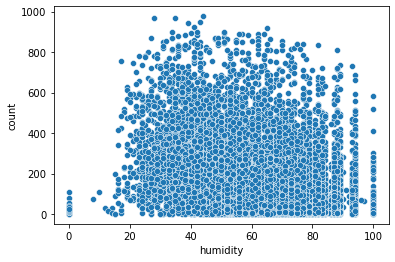

In [64]:
# bikes distribution according to humidity
sns.scatterplot(data=df, x='humidity', y='count')
plt.show()

- Whenever the humidity is less than 20 the demand of bikes are very low.

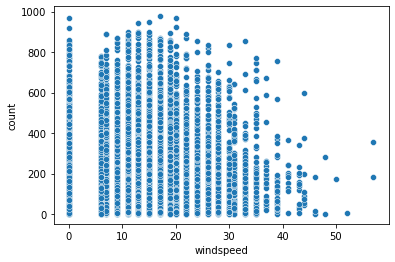

In [65]:
# bikes distribution according to windspeed
sns.scatterplot(data=df, x='windspeed', y='count')
plt.show()

- When windspeed is greater than 35 the demand of bikes are very low.

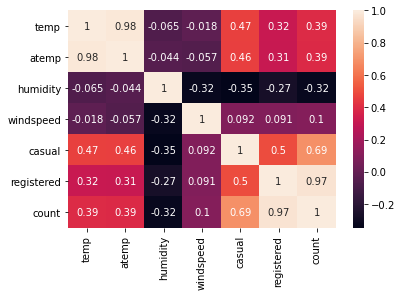

In [66]:
# understanding the correlation between count and numerical variables
df.corr()['count']
sns.heatmap(df.corr(), annot=True)
plt.show()

### TESTING_1

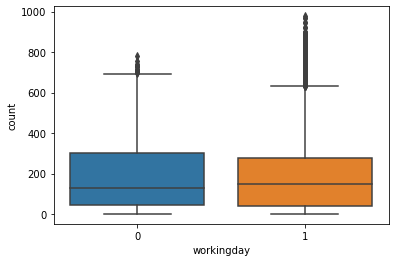

In [67]:
# lets see if workingday is having any effect on the bikes demand

sns.boxplot(data = df, x = 'workingday', y = 'count')
plt.show()

In [68]:
df.groupby(by='workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


- **H0: Working day has no effect on the number of bikes rented.**
- **HA: Working day has some effect on the number of bikes rented.**
- **Significance Level: 5%**
- 2 sample T test can be used here.

- We have to check for Normality,Equal Variance and then we can perform **T Test.**

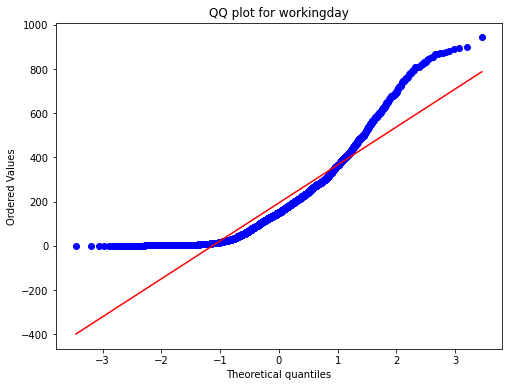

In [69]:
# for normality we can use QQ plot.
plt.figure(figsize = (8, 6))
spy.probplot(df.loc[df['workingday'] == 1, 'count'].sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for workingday')
plt.show()

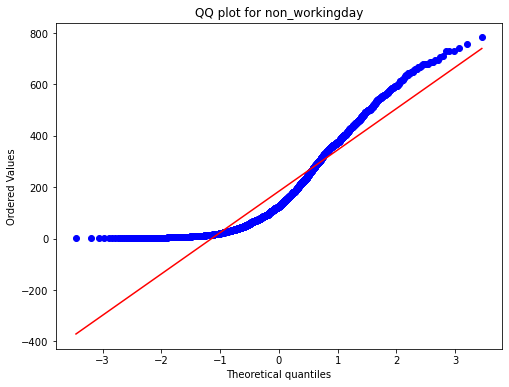

In [70]:
plt.figure(figsize = (8, 6))
spy.probplot(df.loc[df['workingday'] == 0, 'count'].sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for non_workingday')
plt.show()

- The above two plots for working and non-working day shows that the data does not follow normal distribution.

- for more clarity we can check for **Shapiro-Wilk test for normality**
- **H0: The sample follows normal distribution.**
- **HA: The sample does notr follow normal distribution.**
- **Significance level: 5%**


In [71]:
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 1, 'count'].sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 1.4842553334128462e-41
The sample does not follow normal distribution


In [72]:
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 0, 'count'].sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 2.0552858589236735e-39
The sample does not follow normal distribution


- now we will check for variances using **Lavene's test**
- **H0: Variance is homogeneous.**
- **HA: Variance is non-homogeneous.**
- **Significance level: 5%**

In [73]:
test_stat, p_value = spy.levene(df.loc[df['workingday'] == 1, 'count'].sample(2000),
                                df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.6593338859346061
The samples have Homogenous Variance 


- **the variance of the sample is homogeneous we can use T-test now.**

In [74]:
test_stat, p_value = spy.ttest_ind(a=df.loc[df['workingday'] == 1, 'count'],
                                   b=df.loc[df['workingday'] == 0, 'count'], equal_var=True)
print('p-value', p_value)
if p_value < 0.05:
    print('Working day has some effect on the number of bikes rented')
else:
    print('Working day no effect on the number of bikes rented')

p-value 0.22644804226361348
Working day no effect on the number of bikes rented


- **Since pvalue is greater than 0.05 so we can not reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.**

### TESTING_2

In [75]:
df[['weather', 'season']].describe()

,weather,season
count,10886,10886
unique,4,4
top,1,winter
freq,7192,2734


- the above stats shows that weather and season are categorical in nature so, we can go for **chi-squared test** here.

- **H0: weather is independent of season**
- **HA: weather is dependent of seasons.**
- **Significance level: 5%**

In [76]:
cross_table = pd.crosstab(df['season'], df['weather'])
print("Observed values:")
cross_table

Observed values:


weather,1,2,3,4
season,,,,
fall,1930,604,199,0
spring,1759,715,211,1
summer,1801,708,224,0
winter,1702,807,225,0


In [77]:
val = spy.chi2_contingency(cross_table)
print(val)
expected_values = val[3]
print(expected_values)
nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)
alpha = 0.05


chi_sqr = sum([(o-e)**2/e for o, e in zip(cross_table.values, expected_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)

critical_val = spy.chi2.ppf(q=1-alpha, df=dof)
print(f"critical value: {critical_val}")

p_val = 1-spy.chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")


(49.15865559689363, 1.5499250736864862e-07, 9, array([[1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))
[[1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
degrees of freedom:  9
chi-square test statistic:  44.09441248632364
critical value: 16.918977604620448
p-value: 1.3560001579371317e-06


In [78]:
if p_val <= alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


- **Weather is dependent on the season.**

### TESTING_3

- to check if number of bikes rented is similar or different in different weather
- we can use **ANNOVA** here.
- **H0: Number of bikes rented is similar in different weather.**
- **HA: Number of cycles rented is not similar in different weather.**
- **Significance level: 5%**

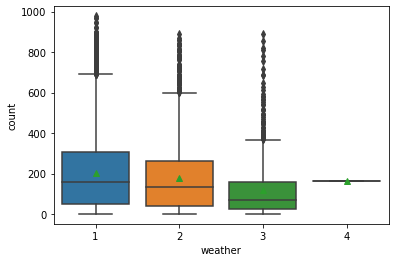

In [91]:
sns.boxplot(data = df, x = 'weather', y = 'count', showmeans = True)
plt.show()

- the 4th weather has only one data show ANNOVA will not be performed on that.

In [92]:
df1 = df.loc[df['weather'] == 1]
df2 = df.loc[df['weather'] == 2]
df3 = df.loc[df['weather'] == 3]
df4 = df.loc[df['weather'] == 4]
len(df1), len(df2), len(df3), len(df4)

(7192, 2834, 859, 1)

- for normality we will go for QQ plot.

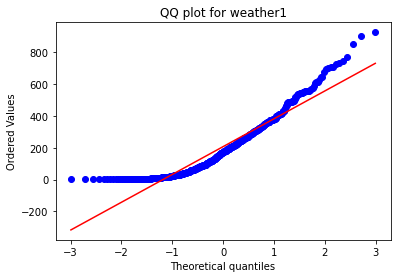

In [95]:
spy.probplot(df1.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather1')
plt.show()

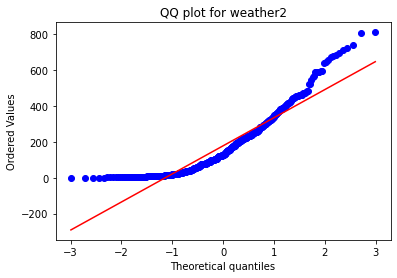

In [96]:
spy.probplot(df2.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather2')
plt.show()

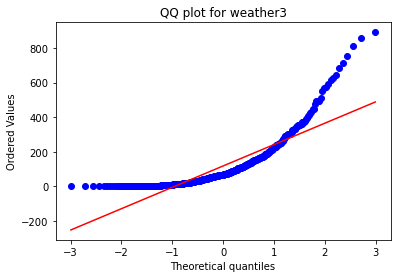

In [97]:
spy.probplot(df3.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather3')
plt.show()

- The above plots shows that the data does not follow normal distribution.


- for more clarity we can check for **Shapiro-Wilk test** for normality
- **H0: The sample follows normal distribution.**
- **HA: The sample does not follow normal distribution.**
- **Significance level: 5%**

In [100]:
test_stat, p_value = spy.shapiro(df1.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.021750814028636e-20
The sample does not follow normal distribution


In [101]:
test_stat, p_value = spy.shapiro(df2.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.365811177603169e-21
The sample does not follow normal distribution


In [102]:
test_stat, p_value = spy.shapiro(df3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.006168785555479e-26
The sample does not follow normal distribution


- now we will check for variances using **Lavene's** test
- **H0: Variance is homogeneous.**
- **HA: Variance is non-homogeneous.**
- **Significance level: 5%**

In [104]:
test_stat, p_value = spy.levene(df1.loc[:, 'count'].sample(500),
                                df2.loc[:, 'count'].sample(500),
                                df3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 5.148522890981896e-16
The samples do not have  Homogenous Variance


- Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., **Kruskal-Wallis H-test** for independent samples.

- **H0 : Mean no. of cycles rented is same for different weather**
- **HA : Mean no. of cycles rented is different for different weather**
- **Significance Level: 5%**

In [113]:
alpha = 0.05
test_stat, p_value = spy.kruskal(df1, df2, df3)  
print('Test Statistic =', test_stat)
print('p value =', p_value)

if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


- **Therefore, Number of cycles rented is not similar in different weather.**

- to check if number of bikes rented is similar or different in different season we can use **ANNOVA** here.
- **H0: Number of bikes rented is similar in different season.**
- **HA: Number of cycles rented is not similar in different season.**
- **Significance level: 5%**

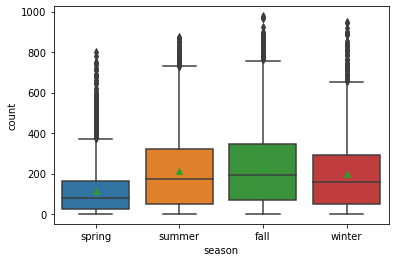

In [114]:
sns.boxplot(data = df, x = 'season', y = 'count', showmeans = True)
plt.show()

In [115]:
df_season_spring = df.loc[df['season'] == 'spring', 'count']
df_season_summer = df.loc[df['season'] == 'summer', 'count']
df_season_fall = df.loc[df['season'] == 'fall', 'count']
df_season_winter = df.loc[df['season'] == 'winter', 'count']
len(df_season_spring), len(df_season_summer), len(df_season_fall), len(df_season_winter)

(2686, 2733, 2733, 2734)

- for normality we will go for QQ plot.

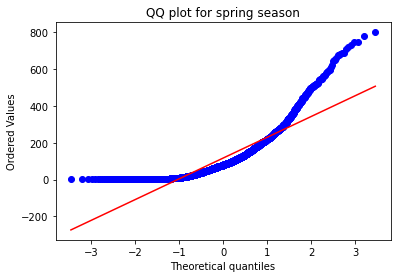

In [116]:
spy.probplot(df_season_spring.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for spring season')
plt.show()

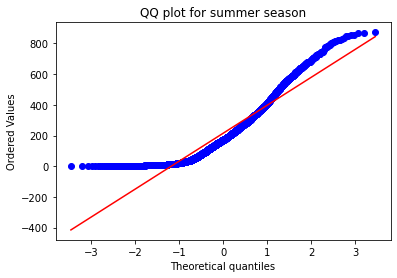

In [117]:
spy.probplot(df_season_summer.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for summer season')
plt.show()

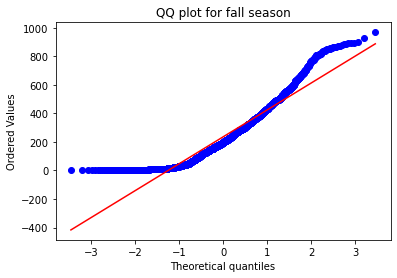

In [118]:
spy.probplot(df_season_fall.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for fall season')
plt.show()

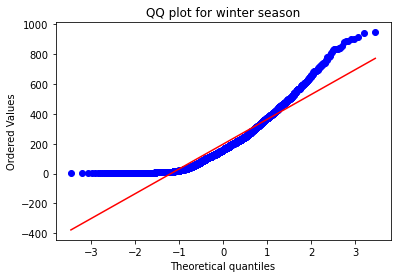

In [119]:
spy.probplot(df_season_winter.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for winter season')
plt.show()

- The above plots shows that the data does not follow normal distribution.
- for more clarity we can check for **Shapiro-Wilk** test for normality
- **H0: The sample follows normal distribution.**
- **HA: The sample does not follow normal distribution.**
- **Significance level: 5%**

In [120]:
test_stat, p_value = spy.shapiro(df_season_spring.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 0.0
The sample does not follow normal distribution


In [121]:
test_stat, p_value = spy.shapiro(df_season_summer.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.5599280288755607e-37
The sample does not follow normal distribution


In [122]:
test_stat, p_value = spy.shapiro(df_season_fall.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.60126182712906e-35
The sample does not follow normal distribution


In [123]:
test_stat, p_value = spy.shapiro(df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 4.5524938896073e-38
The sample does not follow normal distribution


- **the samples data does not follow normal distribution.**
- we will now go for **Levene's test** for variance homogenity

- **H0: Variance is homogeneous.**
- **HA: Variance is non-homogeneous.**
- **Significance level: 5%**

In [124]:
test_stat, p_value = spy.levene(df_season_spring.sample(2500),
                                df_season_summer.sample(2500),
                                df_season_fall.sample(2500),
                                df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 3.519374393205627e-109
The samples do not have  Homogenous Variance


- Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., **Kruskal-Wallis H-test** for independent samples.
- **H0 : Mean no. of cycles rented is same for different season**
- **HA : Mean no. of cycles rented is different for different season**
- **Significance Level: 5%**

In [125]:
alpha = 0.05
test_stat, p_value = spy.kruskal(df_season_spring, df_season_summer, df_season_fall,df_season_winter)  
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 699.6668548181988
p value = 2.479008372608633e-151


In [126]:
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


- **Therefore, the average number of rental bikes is statistically different for different seasons.**

## KEY TAKEAWAYs

- The total time period for which the data is given is '718 days 23:00:00'.
- 81% are registered users and 19% are casual users.
- In summer and fall seasons more bikes are rented as compared to other seasons.
- On holidays more bikes are rented.
- Average hourly count of the total rental bikes is statistically similar for both working and non- working days.
- Average hourly count of rental bikes is the lowest in the month of January followed by February and March.
- Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
- Often the temperature is less than 28 degrees celcius.
- Often, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.


## RECOMMENDATIONs

- Focus on promoting bike rentals during the spring and summer months when there is higher demand. Discount coupons can also be introduced for these seasons.
- In summer and fall seasons the company should have more bikes in stock to be rented. 
- In very low humid days, company should have less bikes in the stock to be rented.
- Company can create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts.
- During the months of january, february and march company can avoid excess bikes.
- Based on weather, temperature and season company can provide basic amenities to riders like umbrella, rain-coat, water bottles etc.